In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic/train.csv')

dataset = dataset.replace(["female", "male"] , [0, 1])
dataset = dataset.replace(["S", "C", "Q"], [0, 1, 2])
dataset = dataset.fillna(0)

y_train = dataset[["Survived"]]
x_train = dataset[["Pclass" , "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

y_train = np.array(y_train)
x_train = np.array(x_train)

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic/test.csv')

dataset = dataset.replace(["female", "male"] , [0, 1])
dataset = dataset.replace(["S", "C", "Q"], [0, 1, 2])
dataset = dataset.fillna(0)

x = dataset[["Pclass" , "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

x = np.array(x)

x_validation = x[ : 209]
x_test = x[209 : ] 

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/titanic/gender_submission.csv')

y = dataset[["Survived"]]

y = np.array(y)

y_validation = y[ : 209]
y_test = y[209 : ]

In [0]:
model = tf.keras.models.Sequential([
        Dense(8, input_dim=7 ,activation="sigmoid"),
        Dense(8, activation="relu"),
        Dropout(0.2),
        Dense(4, activation="sigmoid"),
        Dropout(0.5),
        Dense(2, activation="softmax"),
])

In [0]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1 , 
                                       decay = 0.001
                                       ), 
    loss=tf.losses.sparse_categorical_crossentropy,
    metrics=['accuracy'])

In [14]:
output = model.fit(x_train, y_train,
                   validation_data = (x_validation , y_validation),
                #    class_weight = { 0:1 , 1:3 },
                   epochs=200,
                   shuffle = True)

Epoch 1/200
28/28 [==============================] - 0s 10ms/step - loss: 0.6944 - accuracy: 0.5028 - val_loss: 0.6844 - val_accuracy: 0.6220
Epoch 2/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.6162 - val_loss: 0.6732 - val_accuracy: 0.6220
Epoch 3/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.6162 - val_loss: 0.6668 - val_accuracy: 0.6220
Epoch 4/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6665 - accuracy: 0.6162 - val_loss: 0.6635 - val_accuracy: 0.6220
Epoch 5/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6162 - val_loss: 0.6617 - val_accuracy: 0.6220
Epoch 6/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.6162 - val_loss: 0.6609 - val_accuracy: 0.6220
Epoch 7/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6601 - accuracy: 0.6162 - val_loss: 0.6594 - val_accuracy: 0.6220
Epoch 8/200


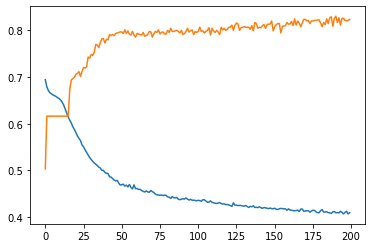

In [15]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.show()

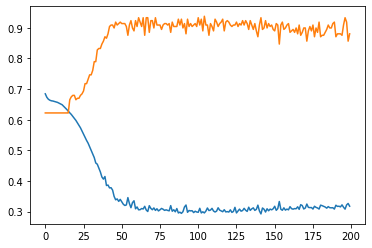

In [16]:
plt.plot(output.history['val_loss'])
plt.plot(output.history['val_accuracy'])
plt.show()

In [0]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8852


[0.28182029724121094, 0.8851674795150757]

In [0]:
jack = np.array([1,1,54,0,0,51.8625,0])

jack = jack.reshape(1, 7)

temp = model.predict(jack)

y_pred = np.argmax(temp, axis=1)
print(y_pred)

[1]
